In [1]:
# import the nescessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn import svm
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
# import the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#checking for the data size and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
# add one more attribute, BMI
BMI=df['Weight'].values/((df['Height'].values)**2)
df['BMI']=BMI
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


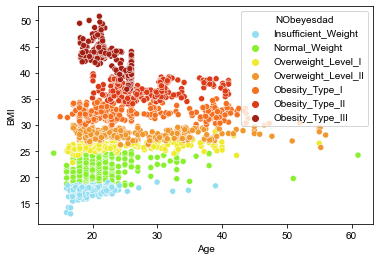

In [5]:
# plot the graph indicates all datapoints fall in the corresponding classes
sns.scatterplot(data=df,x='Age',y='BMI',hue='NObeyesdad', 
                hue_order=('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                     'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'),
                palette=['#93dff1','#88f02d','#f0ea2d','#f0972d','#f46f1f','#dc3b18','#a41f13'])
sns.set(rc={'figure.figsize':(8,5)})

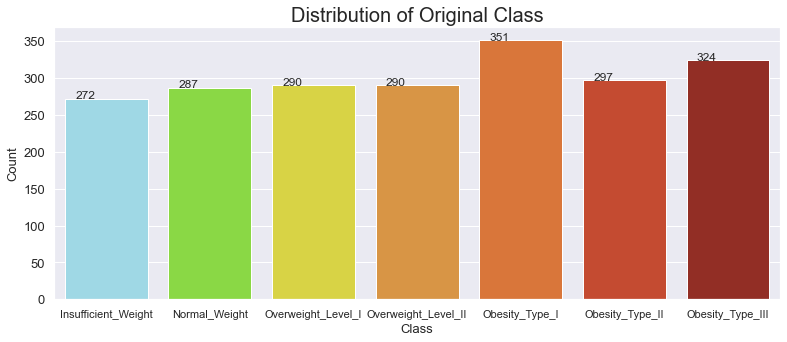

In [7]:
import seaborn as sns
pic = sns.countplot(x="NObeyesdad",
              order=('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                     'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'), 
              data=df,
              palette=['#93dff1','#88f02d','#f0ea2d','#f0972d','#f46f1f','#dc3b18','#a41f13'])

sns.set(rc={'figure.figsize':(13,5)})
plt.title('Distribution of Original Class',size=20)
plt.ylabel('Count',size=13)
plt.xlabel('Class',size=13)
plt.yticks(size=13)
plt.xticks(size=11)

for p in pic.patches:
        pic.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

Code reference:  
colors:https://stackoverflow.com/questions/57417970/how-to-set-custom-colors-on-a-count-plot-in-seaborn  
frontsize: https://stackoverflow.com/questions/63255628/how-to-increase-the-font-size-on-the-countplot-in-python-pandas

In [8]:
# encoding variable into binomial and numerical value
data_encoding = {'Gender':                         {'Male': 0, 'Female': 1},
                'family_history_with_overweight': {'yes': 1, 'no': 0},
                'FAVC':                           {'yes': 1, 'no': 0},
                'CAEC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'SMOKE':                          {'yes': 1, 'no': 0},
                'SCC':                            {'yes': 1, 'no': 0},
                'CALC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'NObeyesdad':                     {'Insufficient_Weight':0, 
                                                   'Normal_Weight':1, 
                                                   'Overweight_Level_I':2,
                                                   'Overweight_Level_II':3,
                                                   'Obesity_Type_I':4, 
                                                   'Obesity_Type_II':5, 
                                                   'Obesity_Type_III':6},}
datas = df.replace(data_encoding)
datas.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,1,24.386526
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,1,24.238227
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,1,23.765432
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,2,26.851852
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,3,28.342381


In [9]:
# encoding mtrans using one-hot encoding method
mtrans = pd.get_dummies(df['MTRANS'])
mtrans.head()

,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,1,0


In [10]:
data = datas.drop(['MTRANS','BMI'], axis=1)
data = pd.concat([data, mtrans], axis=1)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,...,0,0.0,1.0,0,1,0,0,0,1,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,...,1,3.0,0.0,1,1,0,0,0,1,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,...,0,2.0,1.0,2,1,0,0,0,1,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,...,0,2.0,0.0,2,2,0,0,0,0,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,...,0,0.0,0.0,1,3,0,0,0,1,0


In [11]:
# move the class to the first colume
first_column = data.pop('NObeyesdad')
data.insert(0, 'NObeyesdad', first_column)
data.head()

,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,1,21.0,1.62,64.0,1,0,2.0,3.0,1,...,2.0,0,0.0,1.0,0,0,0,0,1,0
1,1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,...,3.0,1,3.0,0.0,1,0,0,0,1,0
2,1,0,23.0,1.80,77.0,1,0,2.0,3.0,1,...,2.0,0,2.0,1.0,2,0,0,0,1,0
3,2,0,27.0,1.80,87.0,0,0,3.0,3.0,1,...,2.0,0,2.0,0.0,2,0,0,0,0,1
4,3,0,22.0,1.78,89.8,0,0,2.0,1.0,1,...,2.0,0,0.0,0.0,1,0,0,0,1,0


In [12]:
# adjust the order of attribute to plot the correlation matrix
attribute=('Gender','Age','Height','Weight','family_history_with_overweight','FAVC',
      'FCVC','NCP','CAEC','CH2O','CALC','SMOKE','SCC','FAF','TUE','Automobile',
      'Bike','Motorbike','Public_Transportation','Walking','NObeyesdad')
corr_data = data.reindex(attribute, axis=1)
corr_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,...,SMOKE,SCC,FAF,TUE,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,2.000000,...,0,0,0.000000,1.000000,0,0,0,1,0,1
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,...,1,1,3.000000,0.000000,0,0,0,1,0,1
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,2.000000,...,0,0,2.000000,1.000000,0,0,0,1,0,1
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,2.000000,...,0,0,2.000000,0.000000,0,0,0,0,1,2
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,2.000000,...,0,0,0.000000,0.000000,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,1.728139,...,0,0,1.676269,0.906247,0,0,0,1,0,6
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,2.005130,...,0,0,1.341390,0.599270,0,0,0,1,0,6
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,2.054193,...,0,0,1.414209,0.646288,0,0,0,1,0,6
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,2.852339,...,0,0,1.139107,0.586035,0,0,0,1,0,6


<AxesSubplot:>

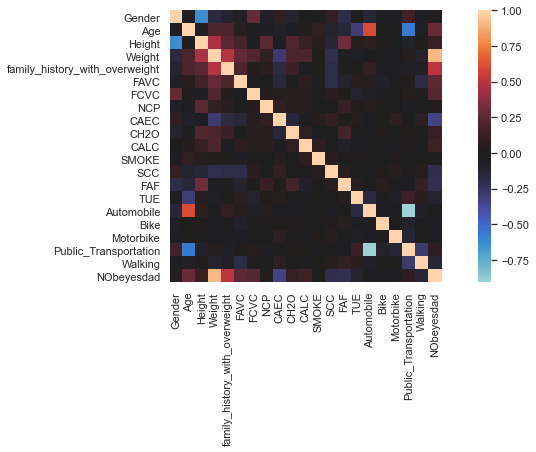

In [13]:
# plot the correlation matrix
df_corr = corr_data.corr()
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns,center=0,square=True)

In [14]:
data = data.drop({'Height', 'Weight'}, axis=1)
data.head()

,NObeyesdad,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,1,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0
1,1,1,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0
2,1,0,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0
3,2,0,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1
4,3,0,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0


In [15]:
# radomizing the order in dataset
data = data.sample(frac=1, random_state=45).reset_index(drop=True)

### SVM classifier

In [16]:
X=data.drop('NObeyesdad', axis=1)
X

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,37.631769,1,1,2.000000,2.582591,1,0,1.535134,0,1.884520,0.000000,1,1,0,0,0,0
1,1,25.897815,1,1,3.000000,3.000000,1,0,1.068493,0,0.112122,1.000000,1,0,0,0,1,0
2,1,18.000000,0,0,2.000000,1.000000,1,0,1.000000,0,0.000000,2.000000,0,0,0,0,1,0
3,0,18.014333,1,1,2.000000,2.805436,1,0,2.122884,0,0.045651,0.017225,2,0,0,0,1,0
4,0,23.083621,1,1,3.000000,2.567567,1,0,2.011023,0,0.916478,0.000000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,17.000000,1,1,2.432302,3.000000,1,0,2.000000,0,2.349495,1.000000,0,1,0,0,0,0
2107,0,25.000000,0,0,3.000000,3.000000,2,0,2.000000,1,3.000000,0.000000,0,0,0,0,1,0
2108,0,18.424941,1,1,2.000000,3.166450,1,0,2.278578,0,1.838881,2.000000,1,0,0,0,1,0
2109,1,26.000000,1,1,3.000000,3.000000,1,0,2.588107,0,0.000000,0.465607,1,0,0,0,1,0


In [17]:
y=data['NObeyesdad']
y

0       4
1       6
2       2
3       2
4       5
       ..
2106    0
2107    1
2108    0
2109    6
2110    5
Name: NObeyesdad, Length: 2111, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NObeyesdad                      2111 non-null   int64  
 1   Gender                          2111 non-null   int64  
 2   Age                             2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   int64  
 4   FAVC                            2111 non-null   int64  
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   CAEC                            2111 non-null   int64  
 8   SMOKE                           2111 non-null   int64  
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   int64  
 11  FAF                             2111 non-null   float64
 12  TUE                             21

In [19]:
# creating a train test split
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [20]:
data_train.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
1295,0,55.246250,0,1,2.000000,3.000000,1,0,2.000000,0,1.000000,0.000000,0,1,0,0,0,0
1627,1,21.009596,1,1,3.000000,3.000000,1,0,1.709556,0,1.592494,0.925843,1,0,0,0,1,0
1388,1,20.000000,0,1,3.000000,3.000000,0,0,2.000000,0,3.000000,0.000000,1,0,0,0,1,0
1318,0,30.577343,1,1,2.050619,3.000000,1,1,1.515183,0,0.849811,0.261901,1,0,0,0,1,0
648,0,38.644441,1,1,2.230742,2.920373,1,0,1.831187,0,0.756277,0.000000,1,1,0,0,0,0


In [21]:
# mapping out the effect of parameters to accuracy
kernels = ['linear', 'rbf', 'poly']
scores = [1, 2, 3, 4, 5]
kernel_cv = pd.DataFrame(index=scores, columns=kernels)
for i in kernels:
    clf = svm.SVC(kernel=i, random_state=45, gamma=0.1)
    clf.fit(data_train, labels_train)
    cv = cross_val_score(clf, X, y, cv=5)
    kernel_cv[i] = cv

Text(0.5, 21.5, 'kernels')

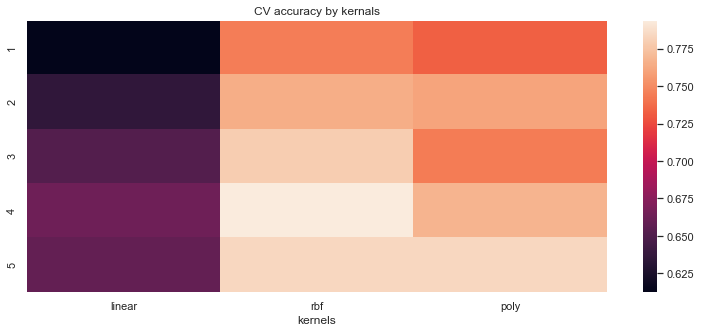

In [22]:
sns.heatmap(kernel_cv)
plt.title('CV accuracy by kernals')
plt.xlabel('kernels')

In [23]:
#creating a classifier
model = svm.SVC(random_state=30)
parameters = [{'kernel': ['linear', 'rbf', 'poly'],
               'C': [0.1, 1, 10],
               'gamma': [0.1, 0.05, 0.1],
               'degree': [2, 3]}]
svm_gridsearch = GridSearchCV(model, parameters, scoring='accuracy')
svm_gridsearch.fit(data_train, labels_train)
svm_cla = svm_gridsearch.best_estimator_

In [24]:
svm_gridsearch.best_params_

{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [25]:
#training the model
svm_cla.fit(data_train, labels_train)

SVC(C=10, degree=2, gamma=0.1, random_state=30)

In [26]:
# timing the processing time
%timeit svm_cla.fit(data_train, labels_train)

84.6 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
# testing for in-sample and off-sample accuracy
svm_y_train = svm_cla.predict(data_train)
svm_y_test = svm_cla.predict(data_test)
svm_train_acc = accuracy_score(labels_train, svm_y_train)
svm_test_acc = accuracy_score(labels_test, svm_y_test)
print('The training accuracy is:', svm_train_acc)
print('The testing sample accuracy is:', svm_test_acc)

The training accuracy is: 0.955568720379147
The testing sample accuracy is: 0.8132387706855791


In [28]:
# 5-folds crossvalidation
svm_5_folds = cross_val_score(svm_cla, X, y, cv=5)
svm_5_folds_mean = svm_5_folds.mean()
svm_5_folds_var = svm_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', svm_5_folds)
print('the 5-folds crossvalidation mean score is:', svm_5_folds_mean)
print('the 5-folds crossvalidation varience is:', svm_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.77541371 0.80331754 0.8436019  0.80331754 0.8056872 ]
the 5-folds crossvalidation mean score is: 0.8062675764400076
the 5-folds crossvalidation varience is: 0.00047271093774462803


In [29]:
print(metrics.classification_report(labels_test, svm_y_test, digits=3))

              precision    recall  f1-score   support

           0      0.732     0.820     0.774        50
           1      0.688     0.532     0.600        62
           2      0.790     0.710     0.748        69
           3      0.745     0.837     0.788        49
           4      0.786     0.902     0.840        61
           5      0.915     0.903     0.909        72
           6      0.984     1.000     0.992        60

    accuracy                          0.813       423
   macro avg      0.806     0.815     0.807       423
weighted avg      0.811     0.813     0.809       423



Text(320.3, 0.5, 'predicted label')

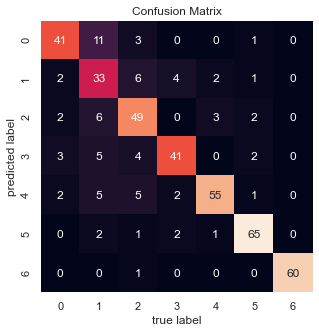

In [30]:
# creating a confusion matrix
svm_matrix = confusion_matrix(labels_test,svm_y_test)
sns.heatmap(svm_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=svm_cla.classes_, yticklabels=svm_cla.classes_)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')
